# Data Analysis


This notebook carries out an exploratory analysis of the processed data provided by the teacher as well as those processed in the project.

## Goals

- Load and inspect the original label file (`OSATS.csv`)
- Analyze the distribution of scores:
  - Global Rating Score (GRS)
  - OSATS criteria (8 sub-scores)
- Explore the contents of `.npz` files created in this project as well as the data provided by the teacher
  - Shape and type of `features`
  
This exploration helps us to have a deeper understanding of the data in order to create better models.


### 0. Inicialization

In [2]:
# Imports
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from pathlib import Path

In [3]:
VIDEO_PATH = '../../OSS_dataset/Train/videos/'
OSATS_PATH = '../../OSS_dataset/Train/OSATS.csv'
NUMPY_PATH = '../../OSS_dataset/Train/numpy_files/'
NUMPY_3FPS_PATH = '../../OSS_dataset/Train/numpy_files_3fps/'
NUMPY_REDUCED_PATH = '../../OSS_dataset/Train/numpy_files_reduced/'
NUMPY_SELF_PATH = "./data_processed/kmeans_clustering/" # Our data



### 1. CSV file Exploration

In [4]:
# Show CSV
df_osats = pd.read_csv(OSATS_PATH, sep=';')
display(df_osats.head())

,STUDENT,GROUP,TIME,SUTURES,INVESTIGATOR,VIDEO,OSATS_RESPECT,OSATS_MOTION,OSATS_INSTRUMENT,OSATS_SUTURE,OSATS_FLOW,OSATS_KNOWLEDGE,OSATS_PERFORMANCE,OSATS_FINAL_QUALITY,GLOBA_RATING_SCORE
0,AHO729,E-LEARNING,PRE,1,A,P54M,2,1,2,2,1,2,2,1,13
1,AHO729,E-LEARNING,PRE,1,B,P54M,2,1,3,1,2,1,2,1,13
2,AHO729,E-LEARNING,PRE,1,C,P54M,2,1,1,1,1,1,1,1,9
3,AHO729,E-LEARNING,POST,"4,5",A,M45P,4,4,4,3,3,4,3,3,28
4,AHO729,E-LEARNING,POST,"4,5",B,M45P,2,3,4,3,3,4,3,3,25


In [5]:
# Extra information
display(df_osats.info())
display(df_osats.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   STUDENT              942 non-null    object
 1   GROUP                942 non-null    object
 2   TIME                 942 non-null    object
 3   SUTURES              942 non-null    object
 4   INVESTIGATOR         942 non-null    object
 5   VIDEO                942 non-null    object
 6   OSATS_RESPECT        942 non-null    int64 
 7   OSATS_MOTION         942 non-null    int64 
 8   OSATS_INSTRUMENT     942 non-null    int64 
 9   OSATS_SUTURE         942 non-null    int64 
 10  OSATS_FLOW           942 non-null    int64 
 11  OSATS_KNOWLEDGE      942 non-null    int64 
 12  OSATS_PERFORMANCE    942 non-null    int64 
 13  OSATS_FINAL_QUALITY  942 non-null    int64 
 14  GLOBA_RATING_SCORE   942 non-null    int64 
dtypes: int64(9), object(6)
memory usage: 110.5+ KB


None

,OSATS_RESPECT,OSATS_MOTION,OSATS_INSTRUMENT,OSATS_SUTURE,OSATS_FLOW,OSATS_KNOWLEDGE,OSATS_PERFORMANCE,OSATS_FINAL_QUALITY,GLOBA_RATING_SCORE
count,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000,942.000000
mean,2.666667,2.333333,2.626327,2.490446,2.464968,2.774947,2.500000,2.460722,20.317410
std,1.102279,1.049940,1.166513,1.150435,1.119978,1.326701,1.135599,1.254978,8.510548
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,13.000000
50%,3.000000,2.000000,3.000000,2.500000,2.000000,3.000000,3.000000,2.000000,21.000000
75%,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,27.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000


In [6]:
# Group By video 
df_video_avg = df_osats.groupby("VIDEO").mean(numeric_only=True).round(0).astype(int)

print(f"Total videos: {len(df_video_avg)}")

display(df_video_avg.head())

Total videos: 314


,OSATS_RESPECT,OSATS_MOTION,OSATS_INSTRUMENT,OSATS_SUTURE,OSATS_FLOW,OSATS_KNOWLEDGE,OSATS_PERFORMANCE,OSATS_FINAL_QUALITY,GLOBA_RATING_SCORE
VIDEO,,,,,,,,,
A31H,1,2,2,2,2,2,2,1,14
A36O,3,1,2,1,1,1,1,1,12
A40E,3,2,2,2,2,2,2,2,16
A41X,5,4,4,5,4,4,4,4,34
A59Z,2,1,2,1,1,1,1,1,11


In [7]:
display(df_video_avg.describe())

,OSATS_RESPECT,OSATS_MOTION,OSATS_INSTRUMENT,OSATS_SUTURE,OSATS_FLOW,OSATS_KNOWLEDGE,OSATS_PERFORMANCE,OSATS_FINAL_QUALITY,GLOBA_RATING_SCORE
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,2.665605,2.340764,2.630573,2.439490,2.433121,2.745223,2.439490,2.429936,20.315287
std,0.952361,0.989624,1.022349,1.074464,1.028500,1.255808,1.112448,1.165202,7.721963
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
25%,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,12.000000
50%,3.000000,2.000000,3.000000,2.500000,3.000000,3.000000,3.000000,2.000000,21.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,27.000000
max,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,36.000000


In [10]:
# Label 
def grs_to_class(grs):
    if 8 <= grs <= 15:
        return 0  # novice
    elif 16 <= grs <= 23:
        return 1  # intermediate
    elif 24 <= grs <= 31:
        return 2  # proficient
    elif 32 <= grs <= 40:
        return 3  # specialist
    else:
        return -1  # inválido

df_video_avg["GRS_CLASS"] = df_video_avg["GLOBA_RATING_SCORE"].apply(grs_to_class)

#### GRS Class
- Most samples are in classes **0 (novice)** and **2 (proficient)**.
- **Expert (class 3)** is underrepresented, which may impact model performance.

#### OSATS Criteria
- Scores are mostly concentrated between **2 and 3**.
- **Extremes (1 and 5)** are rare, especially score 5.
- Some criteria (e.g., `OSATS_KNOWLEDGE`) lean slightly higher.

#### Notes
- The dataset is **imbalanced**, especially in higher skill levels.
- Class imbalance should be considered when training and evaluating models.

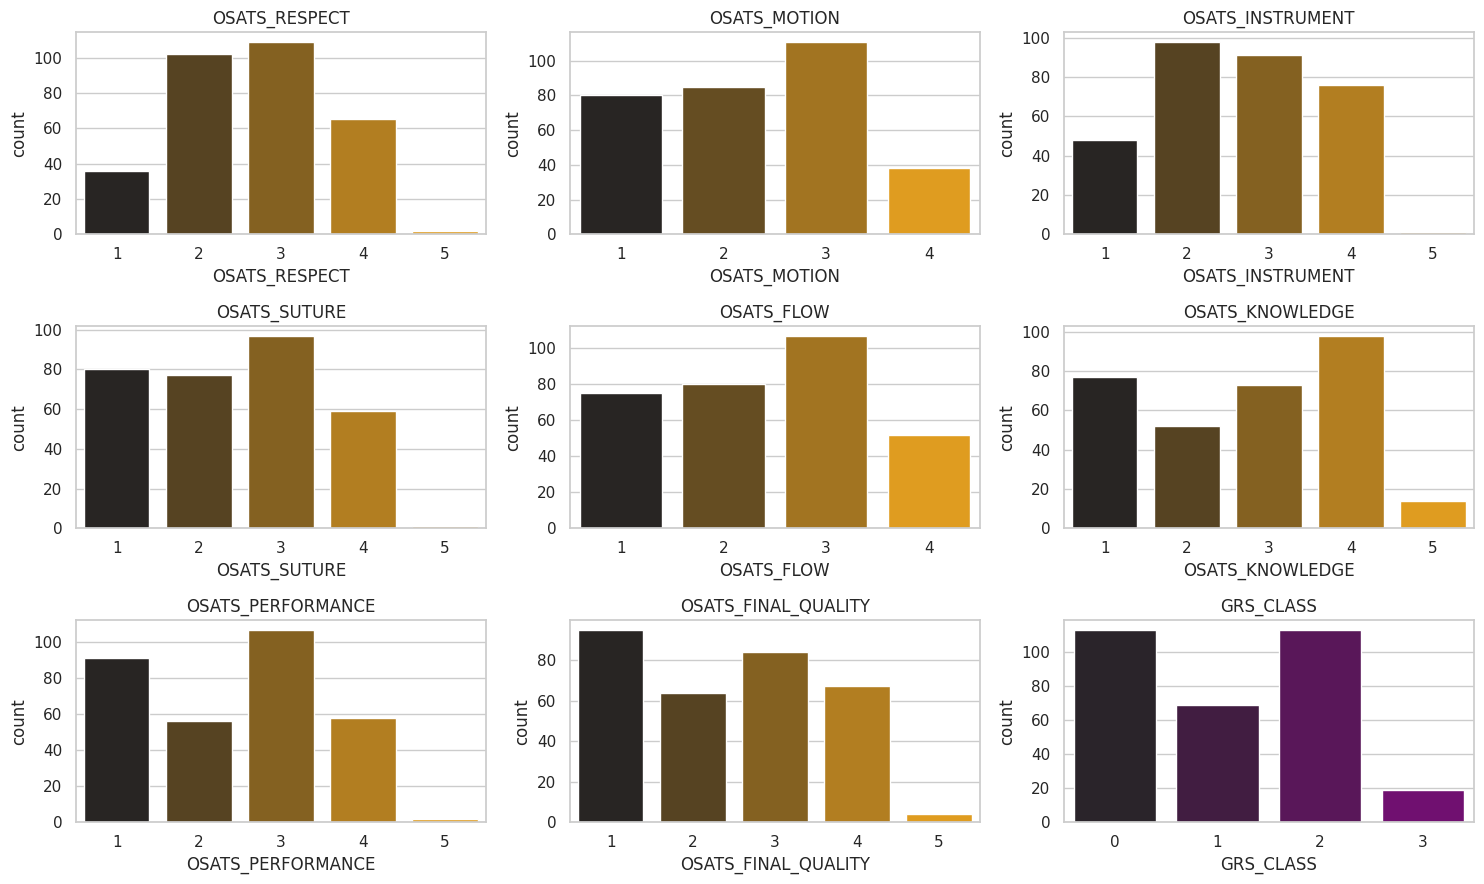

In [17]:
# Distribution 
osats_cols = [
    "OSATS_RESPECT", "OSATS_MOTION", "OSATS_INSTRUMENT", "OSATS_SUTURE",
    "OSATS_FLOW", "OSATS_KNOWLEDGE", "OSATS_PERFORMANCE", "OSATS_FINAL_QUALITY"
]

fig, axes = plt.subplots(3, 3, figsize=(15, 9))
axes = axes.flatten()

# OSATS
for i, col in enumerate(osats_cols):
    sns.countplot(data=df_video_avg, x=col, hue=col, legend=False, ax=axes[i], palette="dark:orange")
    axes[i].set_title(f"{col}")

# GRS class
sns.countplot(data=df_video_avg, x="GRS_CLASS", hue="GRS_CLASS", legend=False, ax=axes[8], palette="dark:purple")
axes[8].set_title("GRS_CLASS")

plt.tight_layout()
plt.show()

### 2. Video Exploration


Video: J83Z.mp4
Num frames: 9089 | FPS: 29.97 | Durtion: 303.24 s


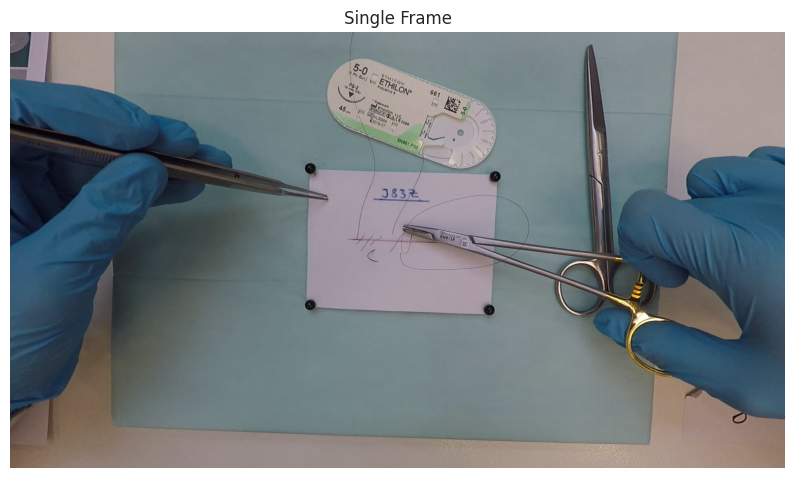

In [ ]:
# Video metadata
video_files = [f for f in os.listdir(VIDEO_PATH) if f.endswith(".mp4")]
video_name = video_files[14]
video_file_path = os.path.join(VIDEO_PATH, video_name)

print(f"\nVideo: {video_name}")

def get_video_metadata(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Error: {video_path}")
    
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    duration_seconds = total_frames / fps
    cap.release()
    
    return {
        "total_frames": total_frames,
        "fps": round(fps, 2),
        "duration_seconds": round(duration_seconds, 2),
    }

meta = get_video_metadata(video_file_path)

print(f"Num frames: {meta['total_frames']} | FPS: {meta['fps']} | Durtion: {meta['duration_seconds']:.2f} s")

cap = cv2.VideoCapture(video_file_path)
middle_frame = int(meta["total_frames"] / 2)
cap.set(cv2.CAP_PROP_POS_FRAMES, middle_frame)
ret, frame = cap.read()
cap.release()

if ret:
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(frame_rgb)
    plt.title("Single Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error")


#### Choosing the 896×896 Crop Format

After exploring various center crop dimensions on representative video frames, we selected the **896×896** format for the following reasons:

- This size captures the central working area (instruments and tissue) while excluding irrelevant borders or static regions

- Square crops (1:1) simplify data augmentation and input formatting for CNNs and transformers.

- We intend to resize the frames to 224*224 and this value is directly proportional


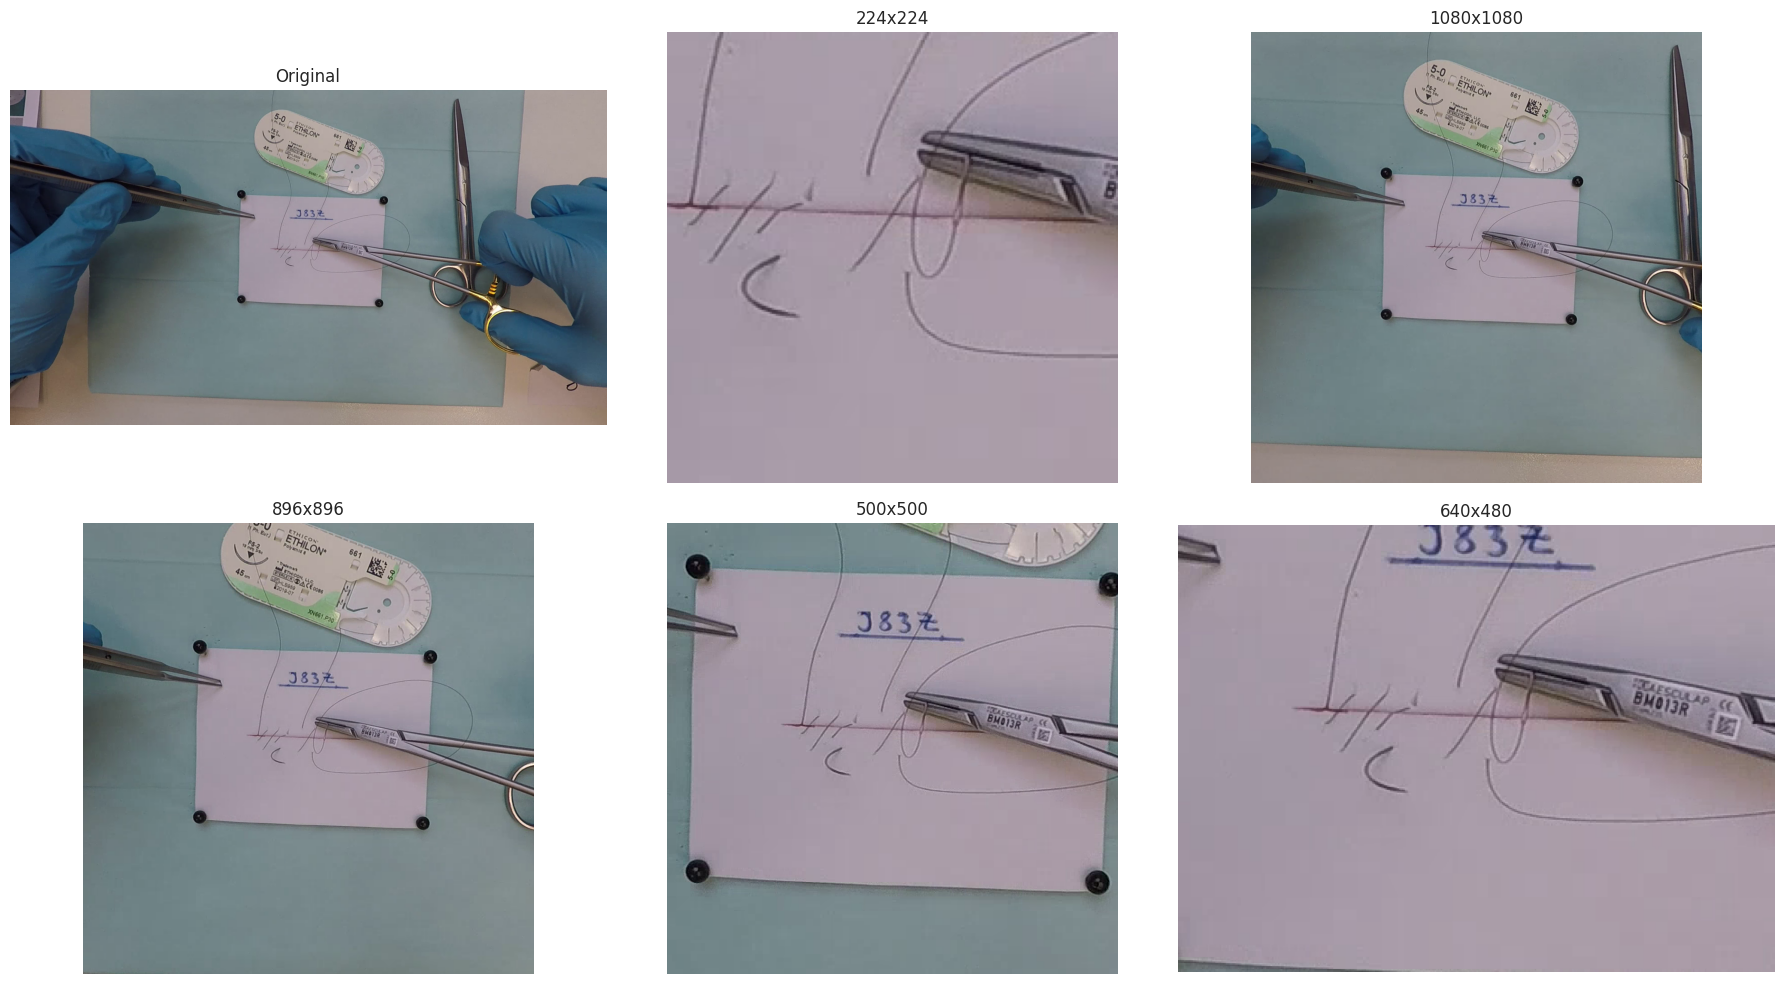

In [27]:
# Crop Test
def center_crop(image, crop_w, crop_h):
    h, w, _ = image.shape
    start_x = w // 2 - crop_w // 2
    start_y = h // 2 - crop_h // 2
    return image[start_y:start_y + crop_h, start_x:start_x + crop_w]

h, w, _ = frame_rgb.shape

crops = {
    "Original": frame_rgb,
    "224x224": center_crop(frame_rgb, 224, 224),
    "1080x1080": center_crop(frame_rgb, 1080, 1080),
    "896x896": center_crop(frame_rgb, 896, 896),
    "500x500": center_crop(frame_rgb, 500, 500),
    "640x480": center_crop(frame_rgb, 400, 300)
}

# Plot crop
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for ax, (label, cropped_img) in zip(axes, crops.items()):
    ax.imshow(cropped_img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()

### 3. Numpy Exploration

In [29]:
def inspect_npz(npz_path):
    data = np.load(npz_path)
    print(f"Content {os.path.basename(npz_path)}:")
    for key in data.files:
        print(f" - {key}: shape {data[key].shape}, dtype {data[key].dtype}")
    
    return data

### 3.1 Numpy Files Exploration

- **`video`**: shape `(300, 384, 20, 20)` — 300 frames, each with 384 feature maps of size 20×20.
- **`score`**: scalar integer — representing a classification label (likely 0–3 or 0–4).

In [34]:
npz_files = [f for f in Path(NUMPY_PATH).glob("*.npz")]

print(f"{len(npz_files)} files found.\n")

for i, fpath in enumerate(npz_files[:3]):
    try:
        inspect_npz(fpath)
        print("-" * 50)
    except Exception as e:
        print(f"Error in {fpath.name}: {e}")

314 files found.

Content T66G.npz:
 - video: shape (300, 384, 20, 20), dtype float64
 - score: shape (), dtype int64
--------------------------------------------------
Content D51V.npz:
 - video: shape (300, 384, 20, 20), dtype float64
 - score: shape (), dtype int64
--------------------------------------------------
Content V02P.npz:
 - video: shape (300, 384, 20, 20), dtype float64
 - score: shape (), dtype int64
--------------------------------------------------


### 3.2 Numpy Files 3FPS Exploration

- **`arr_0`**: a flat vector of length ~140 million (`float64`)
- **`arr_1`**: an integer scalar representing the classification label

#### Observations:
- Based on file size and frame count, the videos are sampled at **3 FPS**, with ~900 frames, each frame represented by **153,600 values**.
- There is no indication of preprocessing or resolution, making it difficult to interpret.
- Most likely it would be 384 feature maps of size 20

In [35]:
npz_files_3fps = [f for f in Path(NUMPY_3FPS_PATH).glob("*.npz")]

print(f"{len(npz_files_3fps)} files found.\n")

for i, fpath in enumerate(npz_files_3fps[:3]):
    try:
        inspect_npz(fpath)
        print("-" * 50)
    except Exception as e:
        print(f"Error in {fpath.name}: {e}")

314 files found.

Content T66G.npz:
 - arr_0: shape (139929600,), dtype float64
 - arr_1: shape (), dtype int64
--------------------------------------------------
Content D51V.npz:
 - arr_0: shape (139929600,), dtype float64
 - arr_1: shape (), dtype int64
--------------------------------------------------
Content V02P.npz:
 - arr_0: shape (140390400,), dtype float64
 - arr_1: shape (), dtype int64
--------------------------------------------------


### 3.3 Numpy Files Reduced Exploration

- **`video`**: array of shape `(300, 300)` — representing 300 frames, each with 300 features.
- Likely represents high-level **per-frame embeddings**, already processed through a neural network (e.g., CNN or MLP)

In [36]:
npz_files_reduced = [f for f in Path(NUMPY_REDUCED_PATH).glob("*.npz")]

print(f"{len(npz_files_reduced)} files found.\n")

for i, fpath in enumerate(npz_files_reduced[:3]):
    try:
        inspect_npz(fpath)
        print("-" * 50)
    except Exception as e:
        print(f"Error in {fpath.name}: {e}")

314 files found.

Content T66G.npz:
 - video: shape (300, 300), dtype float64
--------------------------------------------------
Content D51V.npz:
 - video: shape (300, 300), dtype float64
--------------------------------------------------
Content V02P.npz:
 - video: shape (300, 300), dtype float64
--------------------------------------------------


### 3.4 Our Numpy Exploration

- **`features`**: shape `(300, 2048)` — 300 frames, each with a 2048-dimensional embedding (from a CNN: ResNet50).
- The 300 frames were selected via **KMeans clustering** over a larger set (sampled at 3 FPS), aiming to retain **temporal diversity** while reducing redundancy.
- **`label_task_1`**: single integer — representing the Global Rating Score (GRS) class [0–3].
- **`label_task_2`**: vector of 8 integers — representing the OSATS scores [0–4] for each criterion in the correct order.

In [37]:
npz_files_self = [f for f in Path(NUMPY_SELF_PATH).glob("*.npz")]

print(f"{len(npz_files_self)} files found.\n")

for i, fpath in enumerate(npz_files_self[:3]):
    try:
        inspect_npz(fpath)
        print("-" * 50)
    except Exception as e:
        print(f"Error in {fpath.name}: {e}")

314 files found.

Content T66G.npz:
 - features: shape (300, 2048), dtype float32
 - label_task_1: shape (), dtype int32
 - label_task_2: shape (8,), dtype int32
--------------------------------------------------
Content D51V.npz:
 - features: shape (300, 2048), dtype float32
 - label_task_1: shape (), dtype int32
 - label_task_2: shape (8,), dtype int32
--------------------------------------------------
Content V02P.npz:
 - features: shape (300, 2048), dtype float32
 - label_task_1: shape (), dtype int32
 - label_task_2: shape (8,), dtype int32
--------------------------------------------------
